In [46]:
# install
%pip install mne biosppy neurokit2 numpy pandas matplotlib seaborn peakutils ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [47]:
# all imports
import neurokit2 as nk
import biosppy.signals.eeg as eeg
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [48]:
# enter file name here
file_name = "../raw/" + "despicable_me3.set"

In [49]:
# load raw EEG data
raw = mne.io.read_raw_eeglab(file_name)

# get the data array
data = raw.get_data()

# get sampling frequency
sfreq = raw.info['sfreq']

# display raw object info
raw

C:\Users\JINQI\AppData\Local\Temp\ipykernel_32528\901363872.py:2: RuntimeWarning:

Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file



<RawEEGLAB | despicable_me3.set, 129 x 86724 (173.4 s), ~85.5 MiB, data loaded>

In [54]:
# Explore the data structure
print("Dataset Information:")
print(f"Sampling frequency: {sfreq} Hz")
print(f"Duration: {raw.times[-1]:.2f} seconds")
print(f"Number of channels: {len(raw.ch_names)}")
print(f"Data shape (channels, time points): {data.shape}")
print(f"\nChannel names: {raw.ch_names}...")
print(f"\nChannel types: {set(raw.get_channel_types())}")

# Interactive function to plot different channels and time ranges
def interactive_eeg_plot(channel_idx=0, start_time=0, duration=10, plot_type='raw'):
    """Interactive EEG plotting function"""
    
    # Calculate sample indices
    start_sample = int(start_time * sfreq)
    end_sample = int((start_time + duration) * sfreq)
    
    # Get channel name
    channel_name = raw.ch_names[channel_idx]
    
    # Extract data segment
    signal_segment = data[channel_idx, start_sample:end_sample]
    time_segment = np.arange(len(signal_segment)) / sfreq + start_time
    
    # Create plot
    plt.figure(figsize=(12, 4))
    
    if plot_type == 'raw':
        plt.plot(time_segment, signal_segment, 'b-', linewidth=0.8)
        plt.title(f'{channel_name} - Raw Signal ({start_time}s to {start_time+duration}s)')
    elif plot_type == 'filtered':
        from scipy.signal import butter, filtfilt
        nyquist = sfreq / 2
        low_freq, high_freq = 1, 50 
        b, a = butter(4, [low_freq/nyquist, high_freq/nyquist], btype='band')
        filtered_signal = filtfilt(b, a, signal_segment)
        plt.plot(time_segment, filtered_signal, 'r-', linewidth=0.8)
        plt.title(f'{channel_name} - Filtered Signal (1-50Hz, {start_time}s to {start_time+duration}s)')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (µV)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create interactive widgets
channel_slider = widgets.IntSlider(
    value=0, min=0, max=len(raw.ch_names)-1, step=1,
    description='Channel:', continuous_update=False
)

start_time_slider = widgets.FloatSlider(
    value=0, min=0, max=raw.times[-1]-10, step=1.0,
    description='Start (s):', continuous_update=False
)

duration_slider = widgets.IntSlider(
    value=10, min=1, max=60, step=1,
    description='Duration (s):', continuous_update=False
)

plot_type_dropdown = widgets.Dropdown(
    options=['raw', 'filtered'],
    value='raw',
    description='Plot Type:'
)

# Create interactive widget
interactive_plot = widgets.interactive(
    interactive_eeg_plot,
    channel_idx=channel_slider,
    start_time=start_time_slider,
    duration=duration_slider,
    plot_type=plot_type_dropdown
)

display(interactive_plot)

print("\n✓ Interactive controls:")
print("  - Channel slider: Switch between E1, E2, E3... etc.")
print("  - Start time slider: Choose where to begin viewing")
print("  - Duration slider: Set how many seconds to display")
print("  - Plot type dropdown: Raw vs filtered signal")

Dataset Information:
Sampling frequency: 500.0 Hz
Duration: 173.45 seconds
Number of channels: 129
Data shape (channels, time points): (129, 86724)

Channel names: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E84', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118',

interactive(children=(IntSlider(value=0, continuous_update=False, description='Channel:', max=128), FloatSlide…


✓ Interactive controls:
  - Channel slider: Switch between E1, E2, E3... etc.
  - Start time slider: Choose where to begin viewing
  - Duration slider: Set how many seconds to display
  - Plot type dropdown: Raw vs filtered signal


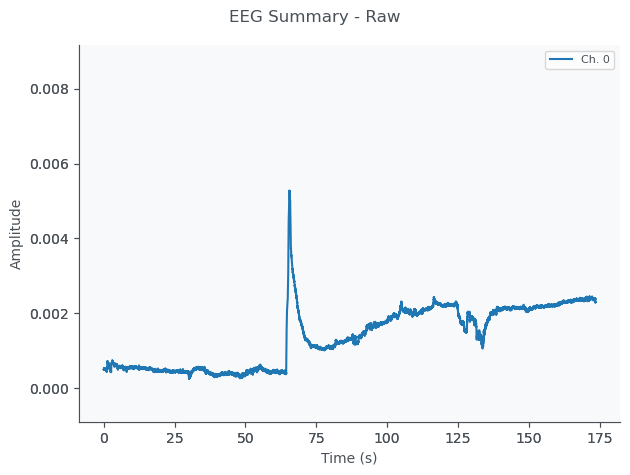

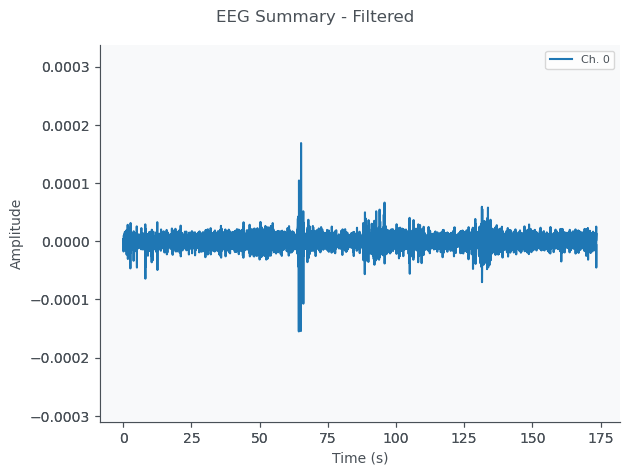

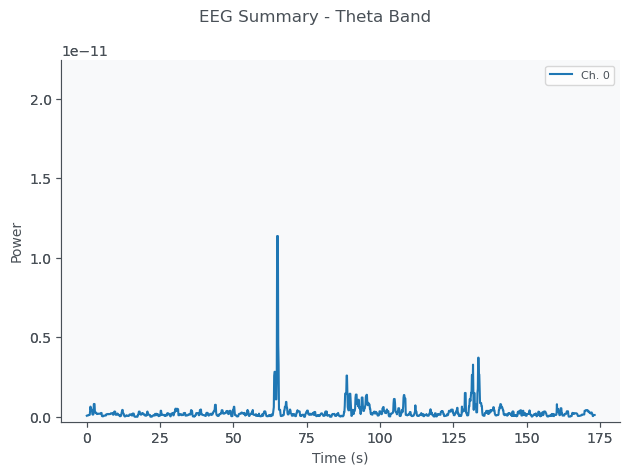

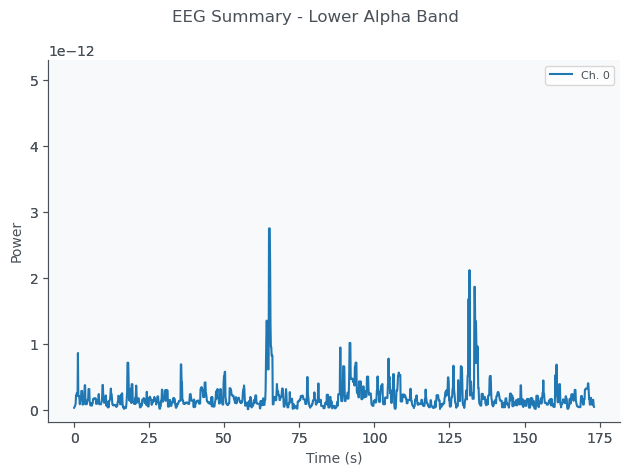

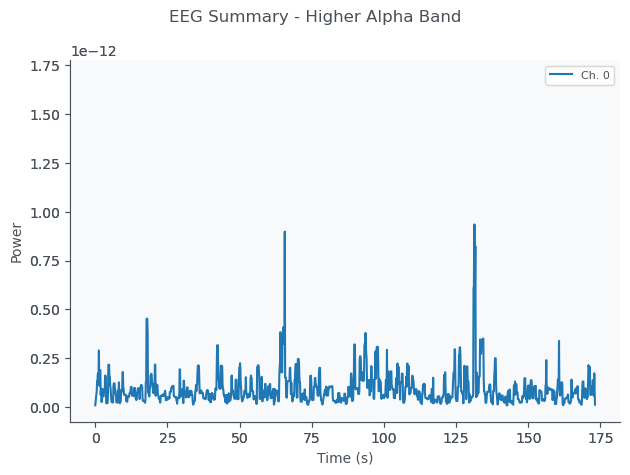

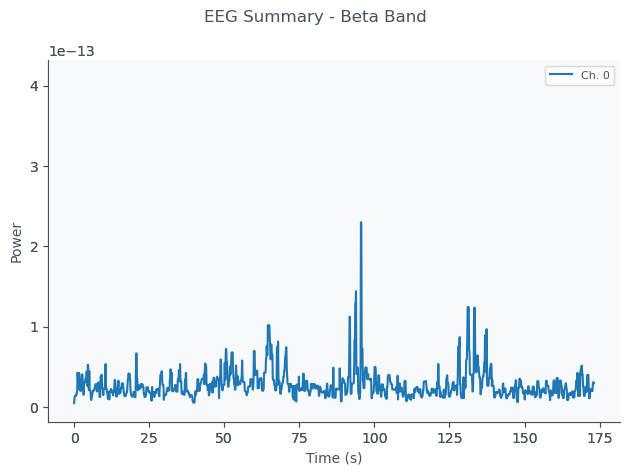

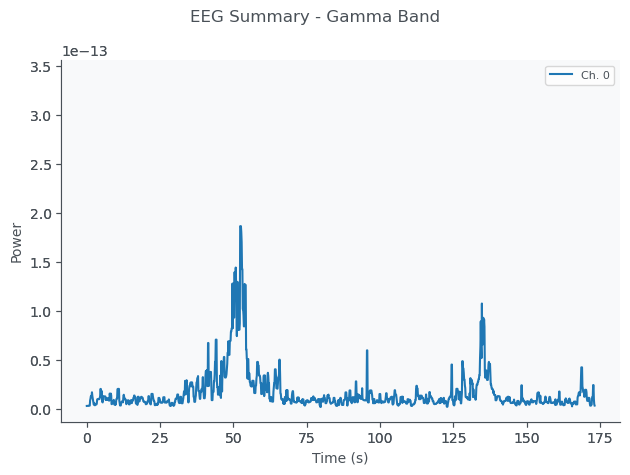

In [51]:
# analyze first channel
channel1_features = eeg.eeg(signal=data[0], sampling_rate=sfreq, show=True)

In [52]:
# Get all E1 channel data and features
print("E1 Channel Data Extraction:")
print("=" * 40)

# 1. Raw E1 signal (all time points)
e1_raw_signal = data[0]  # This is the complete E1 signal
print(f"E1 raw signal shape: {e1_raw_signal.shape}")
print(f"E1 duration: {len(e1_raw_signal) / sfreq:.2f} seconds")

# 2. Get processed features from BioPsy (this returns a structured object)
print(f"\nE1 processed features available:")
print(f"- Raw signal: channel1_features['ts']")
print(f"- Filtered signal: channel1_features['filtered']") 
print(f"- Theta band: channel1_features['theta']")
print(f"- Alpha band: channel1_features['alpha_low']")
print(f"- Beta band: channel1_features['beta']")
print(f"- Gamma band: channel1_features['gamma']")

# 3. Show what's actually in the features object
print(f"\nAvailable keys in channel1_features:")
if 'channel1_features' in locals():
    print(list(channel1_features.keys()))
else:
    print("Run the previous cell first to generate channel1_features")

E1 Channel Data Extraction:
E1 raw signal shape: (86724,)
E1 duration: 173.45 seconds

E1 processed features available:
- Raw signal: channel1_features['ts']
- Filtered signal: channel1_features['filtered']
- Theta band: channel1_features['theta']
- Alpha band: channel1_features['alpha_low']
- Beta band: channel1_features['beta']
- Gamma band: channel1_features['gamma']

Available keys in channel1_features:
['ts', 'filtered', 'features_ts', 'theta', 'alpha_low', 'alpha_high', 'beta', 'gamma', 'plf_pairs', 'plf']


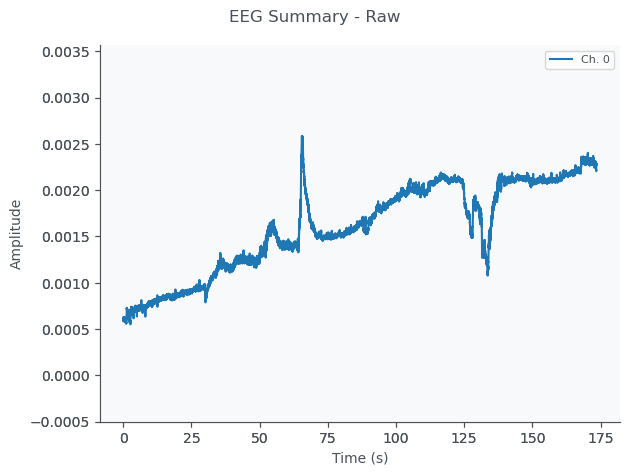

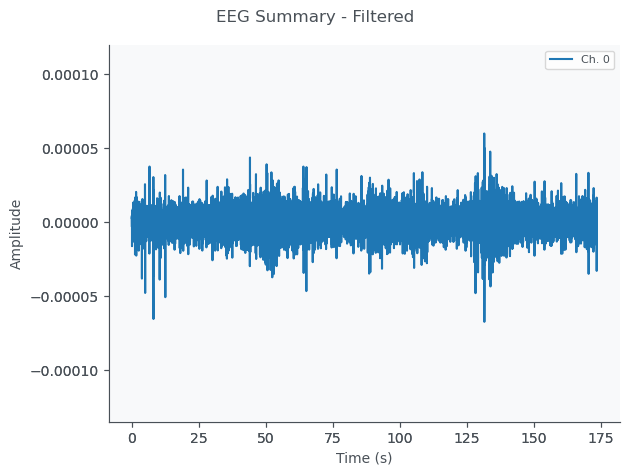

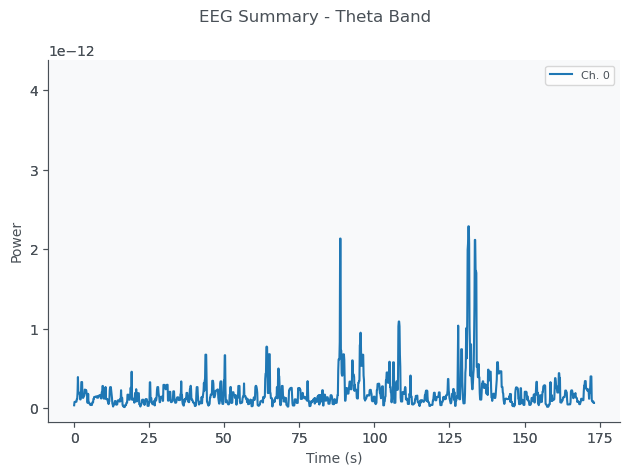

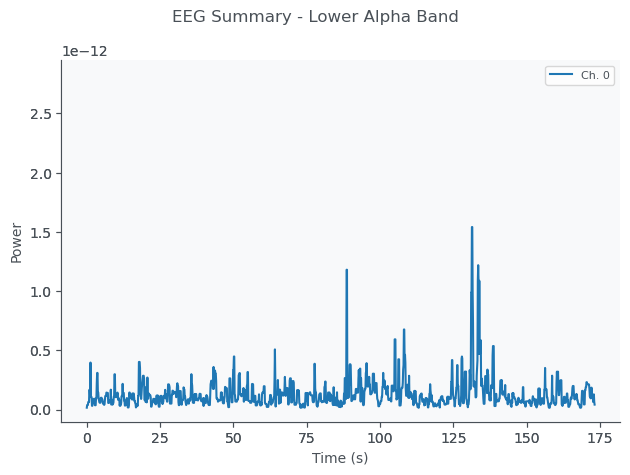

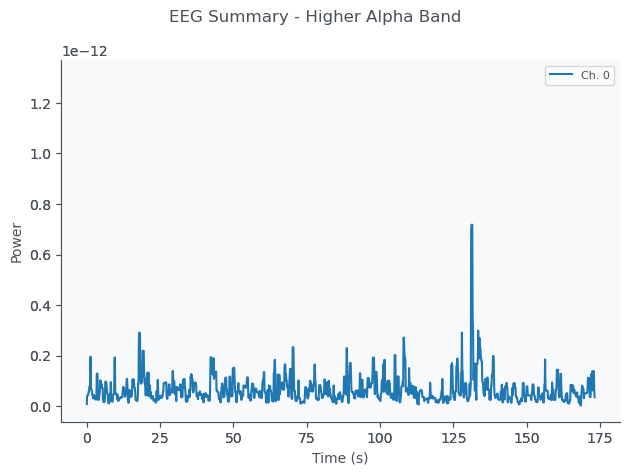

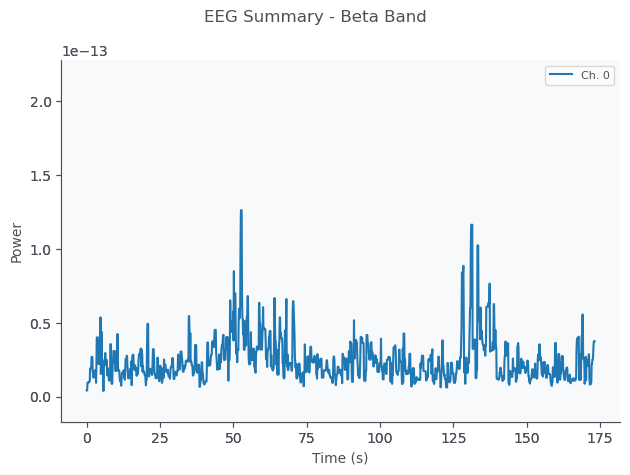

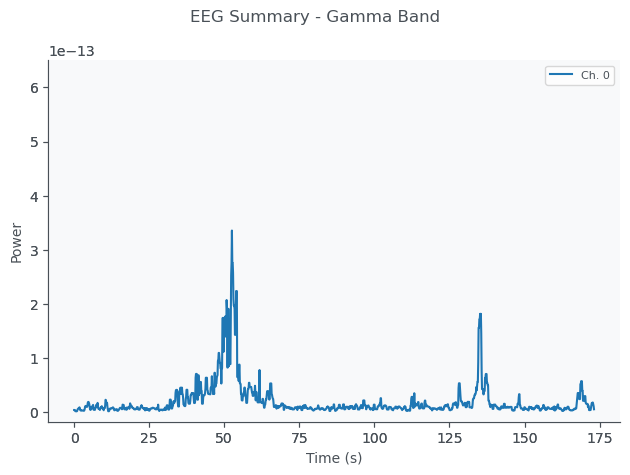

In [53]:
channel2_features = eeg.eeg(signal=data[1], sampling_rate=sfreq, show=True)

In [ ]:
# Enhanced Interactive Plot with BioPsy's Exact Filtering Options
print("BioPsy Filter Options:")
print("=" * 30)

def enhanced_eeg_plot(channel_idx=0, start_time=0, duration=10, filter_type='raw'):
    """Enhanced EEG plotting with BioPsy's exact filters"""
    
    # Calculate sample indices
    start_sample = int(start_time * sfreq)
    end_sample = int((start_time + duration) * sfreq)
    
    # Get channel name and data segment
    channel_name = raw.ch_names[channel_idx]
    signal_segment = data[channel_idx, start_sample:end_sample]
    time_segment = np.arange(len(signal_segment)) / sfreq + start_time
    
    # Create plot
    plt.figure(figsize=(14, 5))
    
    if filter_type == 'raw':
        plt.plot(time_segment, signal_segment, 'b-', linewidth=0.8)
        plt.title(f'{channel_name} - Raw Signal')
        
    elif filter_type == 'biosppy_general':
        # BioPsy's general EEG filter (same as in interactive plot above)
        from biosppy.signals.tools import filter_signal
        filtered_signal, _ = filter_signal(signal_segment, 
                                         ftype='butter', band='bandpass', order=4,
                                         frequency=[1, 40], sampling_rate=sfreq)
        plt.plot(time_segment, filtered_signal, 'r-', linewidth=0.8)
        plt.title(f'{channel_name} - BioPsy General Filter (1-40Hz)')
        
    elif filter_type == 'theta':
        # BioPsy's theta band (4-8 Hz)
        from biosppy.signals.tools import filter_signal
        theta_signal, _ = filter_signal(signal_segment,
                                      ftype='butter', band='bandpass', order=4,
                                      frequency=[4, 8], sampling_rate=sfreq)
        plt.plot(time_segment, theta_signal, 'purple', linewidth=0.8)
        plt.title(f'{channel_name} - Theta Band (4-8Hz)')
        
    elif filter_type == 'alpha':
        # BioPsy's alpha band (8-13 Hz)
        from biosppy.signals.tools import filter_signal
        alpha_signal, _ = filter_signal(signal_segment,
                                      ftype='butter', band='bandpass', order=4,
                                      frequency=[8, 13], sampling_rate=sfreq)
        plt.plot(time_segment, alpha_signal, 'green', linewidth=0.8)
        plt.title(f'{channel_name} - Alpha Band (8-13Hz)')
        
    elif filter_type == 'beta':
        # BioPsy's beta band (13-30 Hz)
        from biosppy.signals.tools import filter_signal
        beta_signal, _ = filter_signal(signal_segment,
                                     ftype='butter', band='bandpass', order=4,
                                     frequency=[13, 30], sampling_rate=sfreq)
        plt.plot(time_segment, beta_signal, 'orange', linewidth=0.8)
        plt.title(f'{channel_name} - Beta Band (13-30Hz)')
        
    elif filter_type == 'gamma':
        # BioPsy's gamma band (30-100 Hz)
        from biosppy.signals.tools import filter_signal
        gamma_signal, _ = filter_signal(signal_segment,
                                      ftype='butter', band='bandpass', order=4,
                                      frequency=[30, 100], sampling_rate=sfreq)
        plt.plot(time_segment, gamma_signal, 'red', linewidth=0.8)
        plt.title(f'{channel_name} - Gamma Band (30-100Hz)')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (µV)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Enhanced widgets with BioPsy filter options
enhanced_channel_slider = widgets.IntSlider(
    value=0, min=0, max=len(raw.ch_names)-1, step=1,
    description='Channel:', continuous_update=False
)

enhanced_start_slider = widgets.FloatSlider(
    value=0, min=0, max=raw.times[-1]-10, step=1.0,
    description='Start (s):', continuous_update=False
)

enhanced_duration_slider = widgets.IntSlider(
    value=10, min=1, max=30, step=1,
    description='Duration (s):', continuous_update=False
)

biosppy_filter_dropdown = widgets.Dropdown(
    options=['raw', 'biosppy_general', 'theta', 'alpha', 'beta', 'gamma'],
    value='raw',
    description='BioPsy Filter:'
)

# Create enhanced interactive widget
enhanced_interactive = widgets.interactive(
    enhanced_eeg_plot,
    channel_idx=enhanced_channel_slider,
    start_time=enhanced_start_slider,
    duration=enhanced_duration_slider,
    filter_type=biospsy_filter_dropdown
)

display(enhanced_interactive)

print("\n🧠 BioPsy Filter Options:")
print("  • Raw: Unfiltered signal")
print("  • BioPsy General: 1-40Hz (same as BioPsy's main filter)")
print("  • Theta: 4-8Hz (drowsiness, meditation)")
print("  • Alpha: 8-13Hz (relaxed awareness)")  
print("  • Beta: 13-30Hz (active thinking)")
print("  • Gamma: 30-100Hz (cognitive processing)")
print("\nThese are the EXACT same filters BioPsy uses internally!")